<a href="https://colab.research.google.com/github/Begum-Guney/python-multiple-regression-example/blob/main/weather_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install if using Colab
!pip install kagglehub seaborn

# Import libraries
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Download dataset
path = kagglehub.dataset_download("budincsevity/szeged-weather")
print("Path to dataset files:", path)

# Read the dataset
df = pd.read_csv(path + '/weatherHistory.csv')

# Preview the first few rows
df.head()



100%|██████████| 2.23M/2.23M [00:00<00:00, 107MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/budincsevity/szeged-weather/versions/1


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
# Select relevant features
df_model = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']].dropna()

# Define X and y
X = df_model[['Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']]
y = df_model['Temperature (C)']

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X_const).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                 1.967e+04
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:02:10   Log-Likelihood:            -3.2576e+05
No. Observations:               96453   AIC:                         6.515e+05
Df Residuals:                   96448   BIC:                         6.516e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   32.6973 

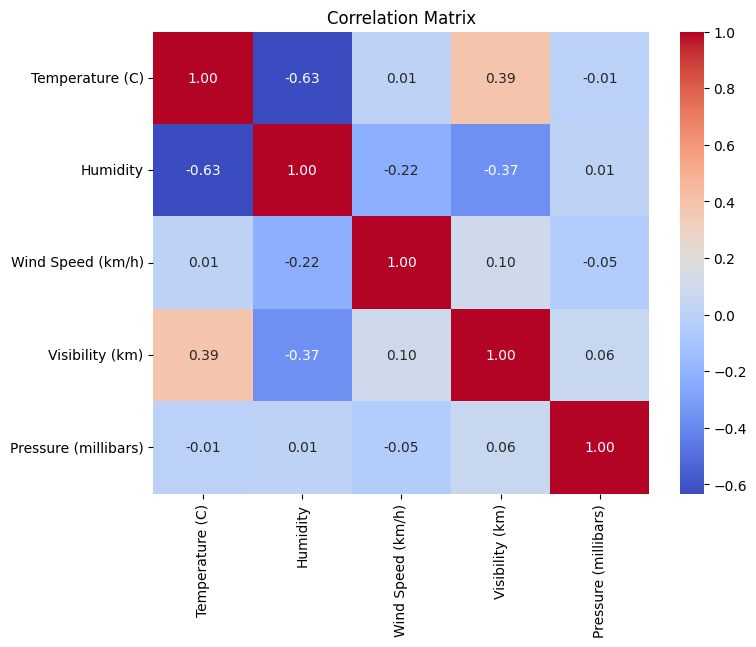

In [6]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

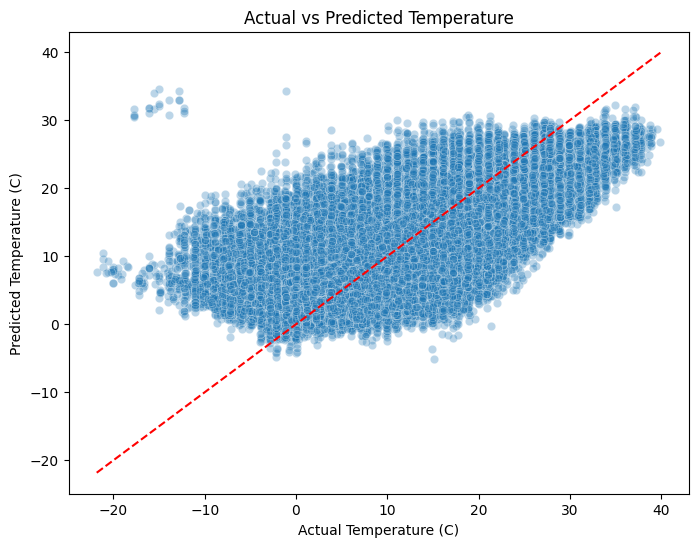

In [7]:
# Predict y
y_pred = model.predict(X_const)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.3)
plt.xlabel("Actual Temperature (C)")
plt.ylabel("Predicted Temperature (C)")
plt.title("Actual vs Predicted Temperature")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()